# Classification

As previously discussed, classification involves and output $y$ which can only be a finite number of values. For the case where $y$ can only be 2 values (classes/categories) this is called binary classification. For this the classes are usually denoted by false and true or 0 and 1. The false class and true class are usually called the negative class and positive class respectively. 

For classification linear regression is not useful as it cannot correctly model the behaviour. Instead we can use logistic regression. 

## Logistic Regression

We can use the sigmoid function as a way to model classifcation. It is defined as

$$g(z) = \frac{1}{1+e^{-z}}$$

Notably g(z) is bounded between 0 and 1. To construct the logistic regression model we do the following

$$h_{\theta}(\vec{x})=g(\theta^{T}x) = \frac{1}{1+e^{-(\theta^{T}x)}}$$

The output can be thought of as the probability that the class is 1 or 

$$h_{\theta}(\vec{x}) = P(y=1 | \vec{x} ; \vec{\theta})$$
$$1-h_{\theta}(\vec{x}) = P(y=0 | \vec{x} ; \vec{\theta})$$

where the semicolon simply lists the parameters (fixed quantities not random variables). Even more compactly

$$p_(y | \vec{x} ; \vec{\theta}) = \left(h_{\theta}(\vec{x})\right)^{y}\left(1-h_{\theta}(\vec{x})\right)^{1-y}$$

## Decision Boundary

The threshold is set in order to determine whether the output will be assigned a 1 or 0. This can be as simple as 0.5 which means that $\vec{w}\cdot \vec{x} + b = 0$. This equation produces a boundary curve called the decision boundary which determines whether y=0 or y=1. Inside and outside are represent each of the respective cases. This decision boundary can be a line, circle, or a complex shape depending on the features and its parameters.

## Cost Function for Logistic Function

One may think the cost function can simply use the MSE like linear regression:

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(\vec{x}\,^{(i)})-y^{(i)}\right)^{2}$$

However, the resulting curve will be one which has multiple local minima and thus non-convex. To fix this we will introduce a better cost function. We will write our cost function in the following form:

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\mathcal{L}\left(h_{\theta}(\vec{x}\,^{(i)}),y^{(i)}\right)$$

where $\mathcal{L}$ is the logistic loss function. We can write the logistic loss function as

$$
\mathcal{L}\left(h_{\theta}(\vec{x}\,^{(i)}),y^{(i)}\right)=\begin{cases}-\ln\left(h_{\theta}(\vec{x}\,^{(i)})\right) & \text{if } y^{(i)}=1 \\ -\ln\left(1-h_{\theta}(\vec{x}\,^{(i)})\right) & \text{if } y^{(i)}=0 \end{cases}
$$

One can confirm that this function is convex. We can also rewrite this as

$$\mathcal{L}\left(h_{\theta}(\vec{x}\,^{(i)}),y^{(i)}\right)= -y^{(i)}\ln\left(h_{\theta}(\vec{x}\,^{(i)})\right) - (1-y^{(i)})\ln\left(1-h_{\theta}(\vec{x}\,^{(i)})\right)$$

and inserting this into our cost function gives

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\ln\left(h_{\theta}(\vec{x}\,^{(i)})\right) + (1-y^{(i)})\ln\left(1-h_{\theta}(\vec{x}\,^{(i)})\right)\right]$$

This loss function can be derived from using maximum likelihood estimation. Recall that 

$$p_(y | \vec{x} ; \vec{\theta}) = \left(h_{\theta}(\vec{x})\right)^{y}\left(1-h_{\theta}(\vec{x})\right)^{1-y}$$

and 

$$L(\theta)=\prod_{i=1}^{m} p(y^{(i)}|\vec{x}\,^{(i)};\theta)= \prod_{i=1}^{m} \left(h_{\theta}(\vec{x}\,^{(i)})\right)^{y\,^{(i)}}\left(1-h_{\theta}(\vec{x}\,^{(i)})\right)^{1-y\,^{(i)}}$$

Computing the $\ell(\theta)$ we have,

\begin{align}
\ell(\theta) = \ln L(\theta) &= \ln \prod_{i=1}^{m} \left(h_{\theta}(\vec{x}\,^{(i)})\right)^{y\,^{(i)}}\left(1-h_{\theta}(\vec{x}\,^{(i)})\right)^{1-y\,^{(i)}} \\[3pt]
&= \sum_{i=1}^{m} \ln\left(h_{\theta}(\vec{x}\,^{(i)})\right)^{y\,^{(i)}}\left(1-h_{\theta}(\vec{x}\,^{(i)})\right)^{1-y\,^{(i)}} \\[3pt]
&= \sum_{i=1}^{m} \left[y^{(i)}\ln\left(h_{\theta}(\vec{x}\,^{(i)})\right) + (1-y^{(i)})\ln\left(1-h_{\theta}(\vec{x}\,^{(i)})\right)\right]
\end{align}

## Gradient Descent

One can derive the gradient descent of the cost function and find that 

$$\vec{\theta} := \vec{\theta} - \frac{\alpha}{m}\sum_{i=1}^{m} \left(h_{\theta}(\vec{x}^{\,(i)})-y^{(i)}\right)\vec{x}^{\,(i)}$$

which is the exact same form as the multiple linear regression (only difference being that $h_{\theta}$ is non-linear). The reason for this similarity is due to both being cases of a generalized linear model (GLM). The stochastic gradient descent has the same form as well.

## Newton's Method

There exists another way to maximize $\ell(\theta)$ and that is by using Newton's Method in the following way. Assume $\theta \in \mathbb{R}$, then:

$$\theta := \theta - \frac{\ell'(\theta)}{\ell''(\theta)}$$

To generalize to $\vec{\theta}$ we write

$$\vec{\theta} := \vec{\theta} - H^{-1}\nabla\ell(\theta)$$

where $H$ is the $n+1$-by-$n+1$ Hessian matrix such that

$$H_{ij} = \frac{\partial^2 \ell(\theta)}{\partial \theta_{i} \partial \theta_{j}}$$

Newton's method converges quadratically and is typically faster than batch gradient descent. However if $n$ is large then it can be much slower since the Hessian matrix must be found and inverted. This type of method of using Newton's method to numerically find the maximum-likelihood is called a scoring algorithm or Fisher's scoring.

## Code Example

The following uses a training set that classifies whether a person will suffer a heart attack based on 13 features/attributes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

df = pd.read_csv("heart.csv")
data = df.to_numpy(dtype=float)

X_train = data[:, :-1]
y_train = data[:, -1]

#Feature scaling which will increase our mean accuracy from 72% to 85% (experimented with this) and faster convergence
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma 
X_norm = np.c_[np.ones(X_norm.shape[0]),X_norm] #Avoids divide by zeros by adding the intercept terms in after feature scaling
w_init = np.zeros(X_norm.shape[1])
iterations = 1000

### Prediction

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(x,w):
    return sigmoid(np.dot(x,w))

### Cost Function

In [3]:
def compute_cost(X,y,w):
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        pred = predict(X[i],w)
        cost += y[i] * math.log(pred) + (1-y[i]) * math.log(1-pred)
    
    return cost / (-m)

### Gradient

In [4]:
def compute_gradient(X,y,w):
    m,n = X.shape
    dj_dw = np.zeros(n)
    
    for i in range(m):  
        pred = predict(X[i],w) 
        err = pred - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j] 
    dj_dw = dj_dw / m 
        
    return dj_dw

### Gradient Descent

In [5]:
def gradient_descent(X, y, w_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    J_history = []
    
    for i in range(num_iters):
        dj_dw = gradient_function(X, y, w)
                                   
        w = w - alpha * dj_dw
        
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w))
        
    return w, J_history

In [9]:
w_final, J_hist = gradient_descent(X_norm, y_train, w_init, 5e-2, iterations, compute_cost, compute_gradient)

0.8514851485148515


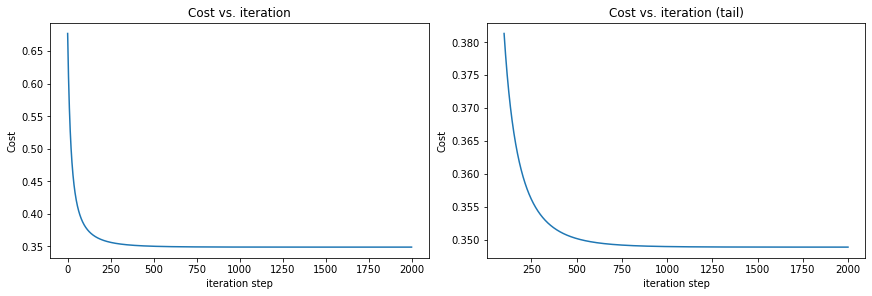

In [10]:
y_predict = []
for i in range(X_train.shape[0]):
    y_predict.append(predict(X_norm[i],w_final))
    
y_predict = np.array(y_predict)
y_predict = np.round(y_predict)
print((y_predict == y_train).mean())

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

The accuracy is confirmed to be good as seen by the below implementation using scikit-learn. Note that feature scaling is extremely important here and without it the accuracy would have been much worse along with poor convergence. Also note that the learning rate will change due to the feature scaling.

In [11]:
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

lr_model = LogisticRegression()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    lr_model.fit(X_train, y_train)

print(lr_model.score(X_train, y_train))

0.8547854785478548
